[View in Colaboratory](https://colab.research.google.com/github/ormarketing/Analytical-Decision-Making/blob/master/Introduction_to_Linear_Programming.ipynb)

# Introduction to Linear Programming
Author: Olivier Rubel, Ph.D.,
        Associate Professor of Marketing
        Graduate School of Management
        UC Davis
        https://github.com/ormarketing

Initial Version: March 26, 2018
This Version   : March 27, 2018

This notebook will be used for teaching Linear Programming to UC Davis MSBA students.
https://gsm.ucdavis.edu/msba-masters-science-business-analytics


# Introduction


#### Example from Bertsimas and Tsitsiklis (1997)

\begin{align}
\text{minimize} \quad &-x_1-x_2\\
\text{s.t.}\quad & x_1 +2x_2\leq 3\\
& 2x_1+x_2\leq 3\\
& x_1,x_2\geq 0
\end{align}

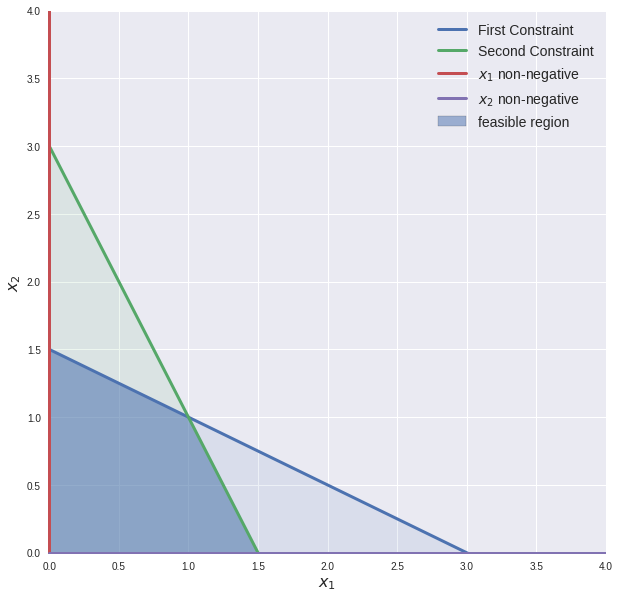

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import seaborn as sns
import numpy as np
# create the plot object

fig, ax = plt.subplots(figsize=(10, 10))
x1 = np.linspace(0, 5)

# Add First 0.5*(3-x1)
plt.plot(x1, 0.5*(3-x1), lw=3, label='First Constraint')
plt.fill_between(x1, 0, 0.5*(3-x1), alpha=0.1)

# Add Second Constraint 
plt.plot(x1, 3 - 2 * x1, lw=3, label='Second Constraint')
plt.fill_between(x1, 0, 3 - 2 * x1, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(x1), x1, lw=3, label='$x_1$ non-negative')
plt.plot(x1, np.zeros_like(x1), lw=3, label='$x_2$ non-negative')

# highlight the feasible region
path = Path([
    (0., 0.),
    (1.5,0.),
    (1.0,1.0),
    (0.0,1.5)
])
patch = PathPatch(path, label='feasible region', alpha=.5)
ax.add_patch(patch)


### finishing the Graph
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.xlim(-0.01, 4)
plt.ylim(-0.01, 4)
plt.legend(fontsize=14)
plt.show()

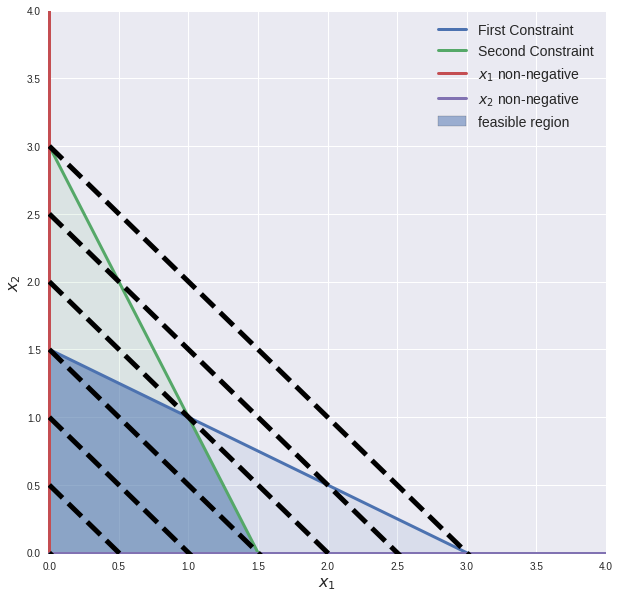

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import seaborn as sns
import numpy as np
# create the plot object

fig, ax = plt.subplots(figsize=(10, 10))
x1 = np.linspace(0, 5)

# Add First 0.5*(3-x1)
plt.plot(x1, 0.5*(3-x1), lw=3, label='First Constraint')
plt.fill_between(x1, 0, 0.5*(3-x1), alpha=0.1)

# Add Second Constraint 
plt.plot(x1, 3 - 2 * x1, lw=3, label='Second Constraint')
plt.fill_between(x1, 0, 3 - 2 * x1, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(x1), x1, lw=3, label='$x_1$ non-negative')
plt.plot(x1, np.zeros_like(x1), lw=3, label='$x_2$ non-negative')

# highlight the feasible region
path = Path([
    (0., 0.),
    (1.5,0.),
    (1.0,1.0),
    (0.0,1.5)
])
patch = PathPatch(path, label='feasible region', alpha=.5)
ax.add_patch(patch)

# Adding Isco-Profit Curves 
plt.plot(x1, 0.0 - x1,color='black',lw=5,linestyle='dashed')
plt.plot(x1, 0.5 - x1,color='black',lw=5,linestyle='dashed')
plt.plot(x1, 1.0 - x1,color='black',lw=5,linestyle='dashed')
plt.plot(x1, 1.5 - x1,color='black',lw=5,linestyle='dashed')
plt.plot(x1, 2 - x1,color='black',lw=5,linestyle='dashed')
plt.plot(x1, 2.5 - x1,color='black',lw=5,linestyle='dashed')
plt.plot(x1, 3.0 - x1,color='black',lw=5,linestyle='dashed')




### finishing the Graph
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.xlim(-0.01, 4)
plt.ylim(-0.01, 4)
plt.legend(fontsize=14)
plt.show()

# Solving the Linear Program
We are going to use CVXOPT a convex optimization modeling language to solve the linear program below


\begin{align}
\text{minimize} \quad &-x_1-x_2\\
\text{s.t.}\quad & x_1 +2x_2\leq 3\\
& 2x_1+x_2\leq 3\\
& x_1,x_2\geq 0
\end{align}

In [2]:
!pip install cvxpy
!pip install cvxopt
from cvxopt import matrix, solvers
import numpy  
A = matrix([ [1.0, 2.0,-1.0,0.0], [2.0,1.0,0.0,-1.0] ])
b = matrix([ 3.0, 3.0,0.0,0.0 ])
c = matrix([ -1.0, -1.0 ])
sol=solvers.lp(c,A,b)
print(sol['x'])
print(sol['primal objective'])
print(numpy.matmul(numpy.transpose(c),sol['x']))


    100% |████████████████████████████████| 163kB 2.4MB/s 
    100% |████████████████████████████████| 696kB 1.4MB/s 
    100% |████████████████████████████████| 122kB 3.8MB/s 
    100% |████████████████████████████████| 1.5MB 631kB/s 
    100% |████████████████████████████████| 143kB 3.8MB/s 
    100% |████████████████████████████████| 51kB 7.0MB/s 
  Running setup.py bdist_wheel for cvxpy ... - \ | / - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/25/7d/12/57dfa9160d887b962454011079e491d815dbfc99e5555fbcef
  Running setup.py bdist_wheel for CVXcanon ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/1b/f6/dd/14f66c64621bddd6b92a3cfc995fa2a21b134fcf4122402b30
  Running setup.py bdist_wheel for ecos ... - \ | / -

 \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/f6/bb/52/1eab61b3c4cd0ef3fac76c374e48b61634d5b2dc5e0336d37e
  Running setup.py bdist_wheel for fastcache ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/1b/ce/51/0614c8aaab5c0893ed5a2098a15673a4949cba59cfa04ceace
  Running setup.py bdist_wheel for multiprocess ... - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/28/ef/9f/5cc70b5d92fc4641b68dc23b3583f2b6ec1d153cb71985aeaf
  Running setup.py bdist_wheel for scs ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/ab/bc/82/27adf950c31daad9d38bcd4fe713989e559c7be4eb4f931d82
  Running setup.py bdist_wheel for toolz ... - \ done
  Stored in directory: /content/.cache/pip/wheels/5

# Senstitivity
Below we are investigating the solution for a slightly different problem, where vector $c$ is $\{1.5,1.0 \}$, instead of $\{1.0,1.0 \}$

\begin{align}
\text{minimize} \quad &-1.5 \times x_1-x_2\\
\text{s.t.}\quad & x_1 +2x_2\leq 3\\
& 2x_1+x_2\leq 3\\
& x_1,x_2\geq 0
\end{align}

In [6]:
from cvxopt import matrix, solvers
import numpy  
A = matrix([ [1.0, 2.0,-1.0,0.0], [2.0,1.0,0.0,-1.0] ])
b = matrix([ 3.0, 3.0,0.0,0.0 ])
c = matrix([ -1.5, -1.0 ])
sol=solvers.lp(c,A,b)
print(sol['x'])
print(sol['primal objective'])
print(numpy.matmul(numpy.transpose(c),sol['x']))


     pcost       dcost       gap    pres   dres   k/t
 0: -2.2500e+00 -9.7500e+00  3e+00  0e+00  2e+00  1e+00
 1: -2.3819e+00 -2.8895e+00  2e-01  2e-16  1e-01  4e-02
 2: -2.4934e+00 -2.5141e+00  8e-03  5e-16  5e-03  1e-03
 3: -2.4999e+00 -2.5001e+00  8e-05  2e-16  5e-05  1e-05
 4: -2.5000e+00 -2.5000e+00  8e-07  1e-16  5e-07  1e-07
 5: -2.5000e+00 -2.5000e+00  8e-09  1e-16  5e-09  1e-09
Optimal solution found.
[ 1.00e+00]
[ 1.00e+00]

-2.499999993404471
[[-2.49999999]]


As you can see, the optimal solution is the same, i.e., $(x_1,x_2)=(1.0,1.0)$, but the value of the objective function is different, i.e., $-2.5$. Below, we display these results.

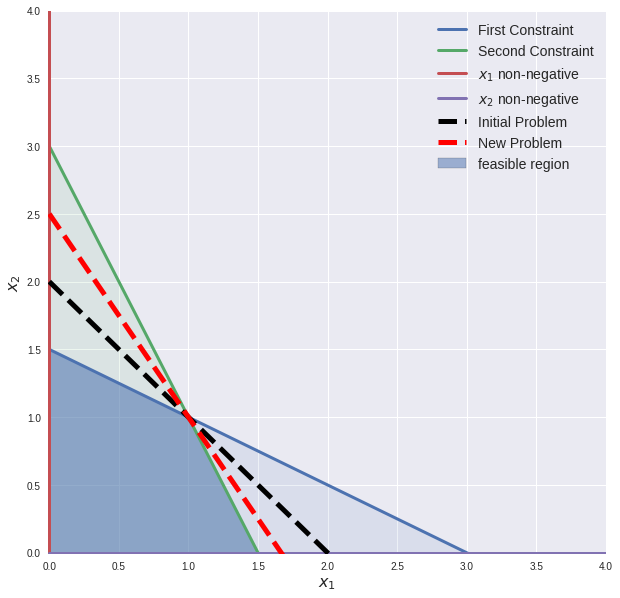

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import seaborn as sns
import numpy as np
# create the plot object

fig, ax = plt.subplots(figsize=(10, 10))
x1 = np.linspace(0, 5)

# Add First 0.5*(3-x1)
plt.plot(x1, 0.5*(3-x1), lw=3, label='First Constraint')
plt.fill_between(x1, 0, 0.5*(3-x1), alpha=0.1)

# Add Second Constraint 
plt.plot(x1, 3 - 2 * x1, lw=3, label='Second Constraint')
plt.fill_between(x1, 0, 3 - 2 * x1, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(x1), x1, lw=3, label='$x_1$ non-negative')
plt.plot(x1, np.zeros_like(x1), lw=3, label='$x_2$ non-negative')

# highlight the feasible region
path = Path([
    (0., 0.),
    (1.5,0.),
    (1.0,1.0),
    (0.0,1.5)
])
patch = PathPatch(path, label='feasible region', alpha=.5)
ax.add_patch(patch)

# Adding Isco-Profit Curves 
plt.plot(x1, 2.0 - x1,color='black',lw=5,linestyle='dashed',label='Initial Problem')
plt.plot(x1, 2.5 -1.5*x1,color='red',lw=5,linestyle='dashed',label='New Problem')


### finishing the Graph
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.xlim(-0.01, 4)
plt.ylim(-0.01, 4)
plt.legend(fontsize=14)
plt.show()

# Additional Resources

* Convex Optimization Book
  * http://stanford.edu/~boyd/cvxbook/
    
* Different solvers
  * https://scaron.info/blog/linear-programming-in-python-with-cvxopt.html
